<a href="https://colab.research.google.com/github/snlynnoo/2018-MachineLearning-Lectures-ESA/blob/master/Final_Rainfall_prediction_Ver_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Rainfall Prediction 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

# Set max row and col for pandas df
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing dataset
rf = pd.read_csv('/content/drive/MyDrive/1_Rainfall/rainfall_data.csv')

##Data Exploration


In [4]:
# Dataset rows and columns
rf.shape

(13514, 15)

In [5]:
# Dataset information 
rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13514 entries, 0 to 13513
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            13514 non-null  object 
 1   temperature     13514 non-null  float64
 2   sun_dur         13514 non-null  float64
 3   sunwave_rad     13514 non-null  float64
 4   r_humidity      13514 non-null  float64
 5   cloud_covr      13514 non-null  float64
 6   pressure        13514 non-null  float64
 7   evapotrans      13514 non-null  float64
 8   soil_temp       13514 non-null  float64
 9   soil_moisture   13514 non-null  float64
 10  vapor_pressure  13514 non-null  float64
 11  wind_speed      13514 non-null  float64
 12  wind_dir        13514 non-null  float64
 13  wind_gust       13514 non-null  float64
 14  rainfall        13514 non-null  float64
dtypes: float64(14), object(1)
memory usage: 1.5+ MB


In [6]:
# Viewing dataset
rf.head(10)

,date,temperature,sun_dur,sunwave_rad,r_humidity,cloud_covr,pressure,evapotrans,soil_temp,soil_moisture,vapor_pressure,wind_speed,wind_dir,wind_gust,rainfall
0,19850101T0000,17.24,581.98,4393.04,74.79,37.10,1015.48,2.64,16.06,0.28,5.62,0.93,289.26,2.00,0.0
1,19850102T0000,16.79,576.65,4733.91,73.79,20.18,1015.70,2.93,16.27,0.28,5.86,1.18,308.82,2.26,0.0
2,19850103T0000,15.96,424.92,4748.15,74.04,60.13,1015.85,2.92,17.05,0.27,5.94,0.92,265.89,1.91,0.0
3,19850104T0000,15.33,419.72,4887.88,75.29,37.93,1016.10,2.85,15.80,0.27,5.35,0.88,298.26,2.31,0.0
4,19850105T0000,15.49,514.05,4951.96,72.13,34.67,1015.27,2.94,17.16,0.27,5.92,1.04,286.70,2.19,0.0
5,19850106T0000,14.96,658.83,5155.77,61.25,0.00,1014.96,3.01,13.42,0.27,7.73,1.16,265.58,1.87,0.0
6,19850107T0000,14.87,612.33,4981.33,62.71,4.42,1016.38,2.88,13.31,0.26,7.31,1.15,310.45,2.07,0.0
7,19850108T0000,15.51,437.56,4981.33,70.42,22.37,1015.56,2.83,14.62,0.26,6.29,1.07,309.81,2.33,0.0
8,19850109T0000,15.22,579.62,5077.45,75.38,17.09,1016.01,2.75,14.76,0.26,5.43,1.03,307.25,1.80,0.0
9,19850110T0000,15.19,464.33,4913.69,76.13,41.00,1014.89,2.72,16.27,0.26,5.14,1.40,288.01,2.35,0.0


### Descriptive Statistics 

In [7]:
# Function to generate descriptive statics with skewness
def describe_with_skew(df):
    desc = df.describe()
    skewness = df.skew()
    desc.loc['skewness'] = skewness
    return desc

In [8]:
# Dataset statistics 
describe_with_skew(rf).T

,count,mean,std,min,25%,50%,75%,max,skewness
temperature,13514.0,19.715729,2.555507,9.82,18.3000,19.680,20.95,27.99,0.182687
sun_dur,13514.0,311.506376,265.469846,0.00,38.9775,264.420,590.36,791.17,0.235598
sunwave_rad,13514.0,3674.445676,1966.830989,408.51,1928.6300,3412.260,5347.12,7913.88,0.246104
r_humidity,13514.0,70.033351,21.861208,13.92,50.7900,76.670,89.00,97.79,-0.563480
cloud_covr,13514.0,55.573773,37.140209,0.00,17.8800,61.755,93.17,100.00,-0.233474
pressure,13514.0,1011.017662,3.788084,998.32,1008.1000,1011.030,1013.95,1022.80,-0.018639
evapotrans,13514.0,2.093273,0.861543,0.00,1.5500,2.050,2.61,5.81,0.302039
soil_temp,13514.0,20.386935,3.184127,10.07,18.5400,20.770,22.07,30.11,-0.210206
soil_moisture,13514.0,0.250021,0.077788,0.07,0.1800,0.280,0.31,0.37,-0.672137
vapor_pressure,13514.0,8.023877,6.629649,0.51,2.7600,5.750,11.99,31.40,0.989135


In [ ]:
# Distribution
rf.hist(bins = 30, figsize = (20,20), color = 'b')

### Correlation Analysis

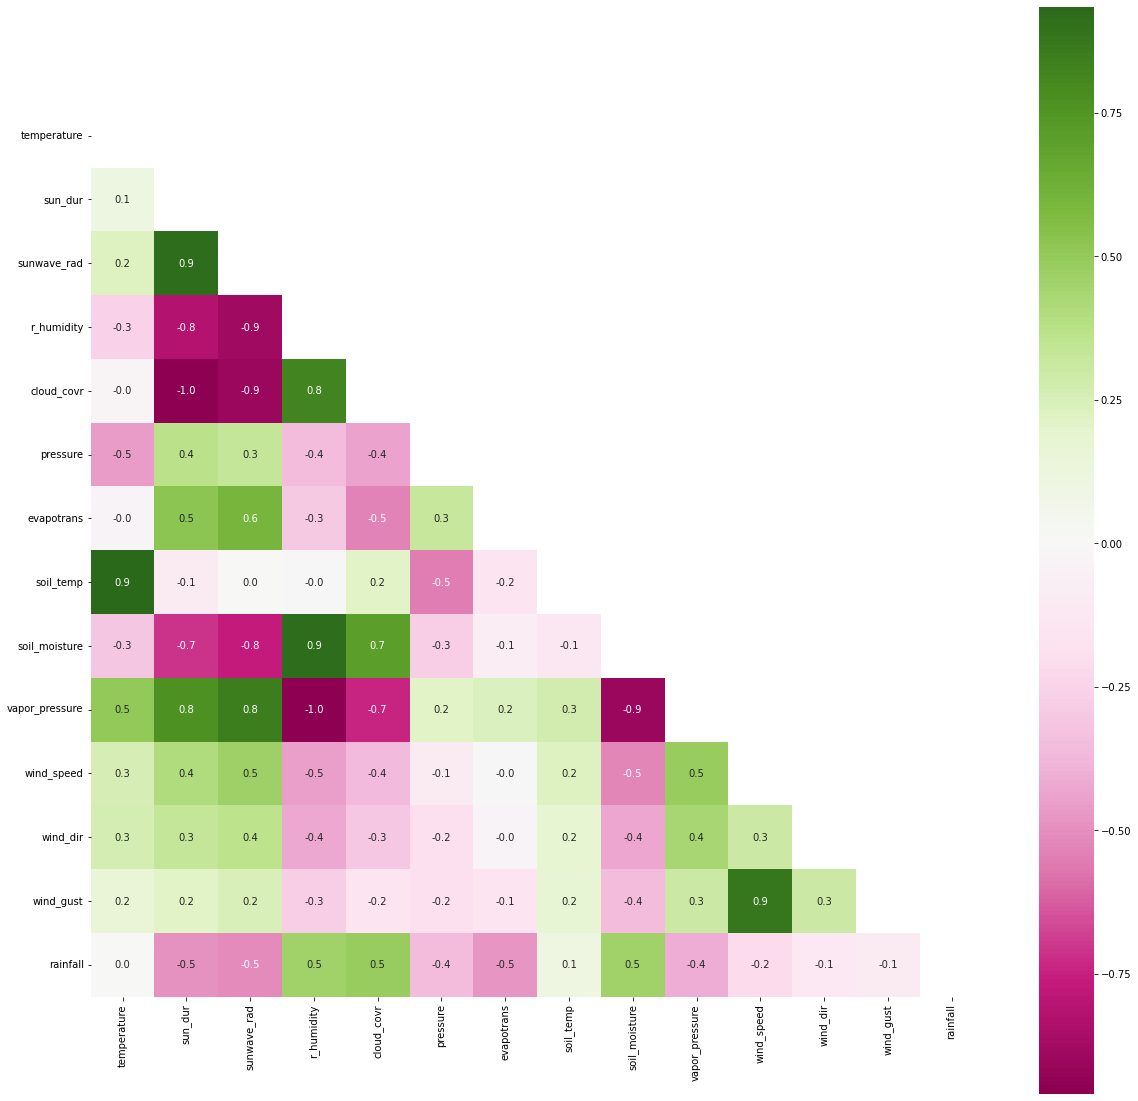

In [ ]:
# Correlation plots
import matplotlib.pyplot as plt
import seaborn as sns
correlations = rf.corr()
mask = np.triu(np.ones_like(correlations, dtype=bool))
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, mask=mask, annot = True, cmap='PiYG', center = 0, fmt = '.1f', square = True)
plt.savefig('correlation_heatmap.png')

## Analysis of Variable

### Univariate Analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("muted", color_codes=True)

# Loop over each column and create a separate figure for each histogram
for col in rf.columns:
    # Create a new figure
    plt.figure(figsize=(12, 6))
    
    # Plot histogram of current column
    sns.histplot(data=rf, x=col, kde=True)
    
    # Add axis labels and title
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title("Histogram of " + col)
    
    # Display the plot
    plt.show()

### Bivariate Analysis

In [ ]:
rf3.hist(bins = 30, figsize = (20,20), color = 'b')

### Anamalies Detection

#### Missing Values

In [ ]:
# Checking missing values
rf.isnull().sum()

date              0
temperature       0
sun_dur           0
sunwave_rad       0
r_humidity        0
cloud_covr        0
pressure          0
evapotrans        0
soil_temp         0
soil_moisture     0
vapor_pressure    0
wind_speed        0
wind_dir          0
wind_gust         0
rainfall          0
dtype: int64

#### Zero variance variables

In [ ]:
# Listing features having zero varience
var_zero = list(rf.var()[rf.var() == 0].keys())
print(pd.DataFrame(var_zero)) 

Empty DataFrame
Columns: []
Index: []


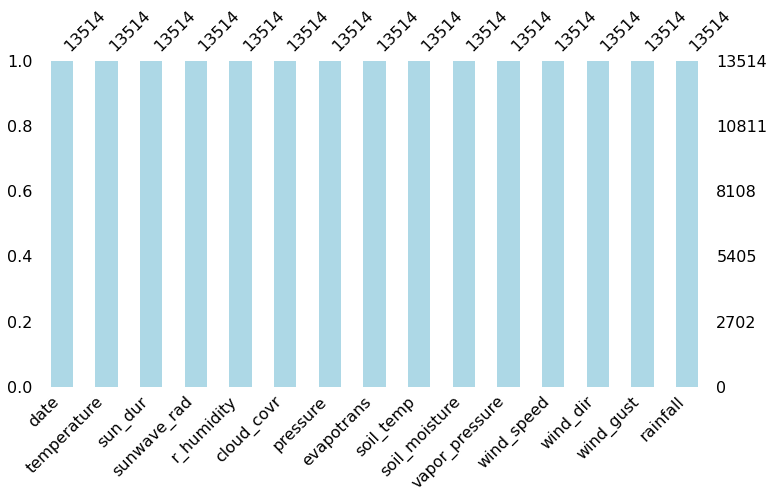

In [17]:
msno.bar(rf, color = 'lightblue', figsize=(12, 6))
plt.show()

#### Duplicate data

In [ ]:
# Check duplicates
rf[rf.duplicated()== True].count()

date              0
temperature       0
sun_dur           0
sunwave_rad       0
r_humidity        0
cloud_covr        0
pressure          0
evapotrans        0
soil_temp         0
soil_moisture     0
vapor_pressure    0
wind_speed        0
wind_dir          0
wind_gust         0
rainfall          0
dtype: int64

#### Outliers detection using Box-Plot

In [ ]:
# Loop through each column and create box plots
for col in rf.columns:
    fig, ax = plt.subplots(figsize=(10, 10))  # set the figure size here
    sns.boxplot(data=rf[col], ax=ax)
    ax.set_title('Box plot of ' + col)
    plt.show()

In [ ]:
# # Univariate
# # Create a scatter plot
# plt.scatter('timestamp', 'temp_me', 'cloud_covr', 'pressr_me', 'evapotrans',
#        'soil_moi_me', 'wspeed_10m_me', 'wdir_10m', c='rainfall_amt')

# # Add labels and title
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Bivariate Scatter Plot with Target Variable')

# # Show the plot
# plt.show()

In [ ]:
# # Create a figure and axis
# fig, ax = plt.subplots()

# # Plot the first set of data
# ax.scatter(rf3['temp_me'], rf3['rainfall_amt'], c='blue', label='Temperature Vs Rainfall')
# ax.scatter(rf3['cloud_covr'], rf3['rainfall_amt'], c='orange',  label='Cloud Vs Rainfall')
# ax.scatter(rf3['pressr_me'], rf3['rainfall_amt'], c='red', label='Pressure Vs Rainfall')
# ax.scatter(rf3['evapotrans'], rf3['rainfall_amt'], c='yellow',  label='Evaportrans Vs Rainfall')
# ax.scatter(rf3['soil_moi_me'], rf3['rainfall_amt'], c='black',  label='Soil moisture Vs Rainfall')
# ax.scatter(rf3['wspeed_10m_me'], rf3['rainfall_amt'], c='pink',  label='Wind Speed Vs Rainfall')
# ax.scatter(rf3['wdir_10m'], rf3['rainfall_amt'], c='green',  label='Wind Direction Vs Rainfall')

# # Add labels and title
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_title('Scatter Plot for Several Variables')

# # Add a legend
# ax.legend()

# # Show the plot
# plt.show()

In [ ]:
# # Create a figure and axis
# fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(2, 3, figsize=(15, 5))

# # Plot the first set of data
# ax1.scatter(rf3['temp_me'], rf3['rainfall_amt'], c='blue')
# ax1.set_xlabel('Temperature')
# ax1.set_ylabel('Rainfall')
# ax1.set_title('Temperature Vs Rainfall')
# ax1.legend()

# # Plot the first set of data
# ax2.scatter(rf3['cloud_covr'], rf3['rainfall_amt'], c='orange')
# ax2.set_xlabel('Cloud Coverage')
# ax2.set_ylabel('Rainfall')
# ax2.set_title('Cloud Vs Rainfall')
# ax2.legend()

# # Plot the first set of data
# ax3.scatter(rf3['pressr_me'], rf3['rainfall_amt'], c='red')
# ax3.set_xlabel('Pressure')
# ax3.set_ylabel('Rainfall')
# ax3.set_title('Pressure Vs Rainfall')
# ax3.legend()

# # Plot the first set of data
# ax4.scatter(rf3['evapotrans'], rf3['rainfall_amt'], c='yellow')
# ax4.set_xlabel('Pressure')
# ax4.set_ylabel('Rainfall')
# ax4.set_title('Evaportrans Vs Rainfall')
# ax4.legend()

# # Plot the first set of data
# ax5.scatter(rf3['soil_moi_me'], rf3['rainfall_amt'], c='black')
# ax5.set_xlabel('Soil moisture')
# ax5.set_ylabel('Rainfall')
# ax5.set_title('Soil moisture Vs Rainfall')
# ax5.legend()

# # Plot the first set of data
# ax6.scatter(rf3['wspeed_10m_me'], rf3['rainfall_amt'], c='pink')
# ax6.set_xlabel('Wind Speed')
# ax6.set_ylabel('Rainfall')
# ax6.set_title('Wind Speed Vs Rainfall')
# ax6.legend()

# # Plot the first set of data
# ax7.scatter(rf3['wdir_10m'], rf3['rainfall_amt'], c='green')
# ax7.set_xlabel('Wind Direction')
# ax7.set_ylabel('Rainfall')
# ax7.set_title('Wind Direction Vs Rainfall')
# ax7.legend()

# # Show the plot
# plt.show()

In [ ]:
# import matplotlib.pyplot as plt

# # Sample data
# x = [1, 2, 3, 4, 5]
# y = [2, 4, 5, 4, 5]
# target = [0, 1, 0, 1, 1]

# # Create a scatter plot
# plt.scatter(x, y, c=target)

# # Add labels and title
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Bivariate Scatter Plot with Target Variable')

# # Show the plot
# plt.show()

In [ ]:
# bivariate analysis


# Data Pre-processing


In [ ]:
# Handling missing values

In [ ]:
# Data Transformation

In [ ]:
# Handling dependent variable

In [ ]:
# Outliers handling

##Feature Selection

In [ ]:
# Stepwise regression

In [ ]:
# Correlaiton Analysis

In [ ]:
# Freature to be dropped, Step 1
drop_list_1 = ['timestamp','temp_mx', 'temp_mi', 'dir_sw_rad', 'diff_sw_rad',
               'rh_mx', 'rh_mi', 'pressr_mi', 'pressr_mx', 
               'soil_moi_mx', 'soil_moi_mi', 'vapor_pmx', 'vapor_pmi',
               'wspeed_10m_mx', 'wspeed_10m_mi', 'wspeed_80m_mx', 'wspeed_80m_mi',
               'wdir_80m', 'wgust_mi', 'wgust_mx']

# Copy dataframe as rf1
rf1 = rf.copy()

# Dropping features 
rf1.drop(drop_list_1, axis = 1, inplace = True)

In [ ]:
# Recursive Random Forests (Feature importance)

## Normalization

# Data Partition

In [ ]:
# Assiging independent and dependent variable
X = rf3.iloc[: , :-1]
y = rf3.iloc[:, -1]
print(y.shape, X.shape)

(13514,) (13514, 7)


In [ ]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: rainfall_amt, dtype: float64

In [ ]:
X.head()

,temp_me,cloud_covr,pressr_me,evapotrans,soil_moi_me,wspeed_10m_me,wdir_10m
0,17.24,37.10,1015.48,2.64,0.28,0.93,289.26
1,16.79,20.18,1015.70,2.93,0.28,1.18,308.82
2,15.96,60.13,1015.85,2.92,0.27,0.92,265.89
3,15.33,37.93,1016.10,2.85,0.27,0.88,298.26
4,15.49,34.67,1015.27,2.94,0.27,1.04,286.70


In [ ]:
# Data partitioning 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(9459, 7) (9459,)
(4055, 7) (4055,)


# Modelling 

#### Random Forest

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(9459, 7) (9459,)
(4055, 7) (4055,)


In [ ]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_rf_reg = rf_reg.predict(X_test)

##### Feature importance

In [ ]:
# Get feature importances
importances = rf_reg.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

# Plot feature importances
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.show()

#### Support Vector Machine

In [ ]:
from sklearn.svm import SVR

# SVR with linear kernel
svr_l = SVR(kernel='linear')
svr_l.fit(X_train, y_train)
y_pred_svr_l = svr_l.predict(X_test)

# SVR class with polynomial kernel of degree 3
svr_poly = SVR(kernel='poly', degree=3)
svr_poly.fit(X_train, y_train)
y_pred_svr_poly = svr_poly.predict(X_test)

# SVR class with RBF kernel
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(X_train, y_train)
y_pred_svr_rbf = svr_rbf.predict(X_test)

# SVR class with sigmoid kernel
svr_sigmoid = SVR(kernel='sigmoid')
svr_sigmoid.fit(X_train, y_train)
y_pred_svr_sigmoid = svr_sigmoid.predict(X_test)


#### Artificial Neural Network

# Model Evaluation

#### Random Forest 

In [ ]:
# RMSE
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf_reg))
print("RMSE:", rmse_rf)

# MAE
mae_rf = mean_absolute_error(y_test, y_pred_rf_reg)
print("MAE:", mae_rf)

# R^2
r2_rf = r2_score(y_test, y_pred_rf_reg)
print("R-Square:", r2_rf)


RMSE: 5.932869323906429
MAE: 2.862330702836005
R-Square: 0.8320998243008676


In [ ]:
print("Random Forest")
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf_reg))
print("RMSE:", round(rmse_rf, 4))

# MAE
mae_rf = mean_absolute_error(y_test, y_pred_rf_reg)
print("MAE:", round(mae_rf, 4))

# R^2
r2_rf = r2_score(y_test, y_pred_rf_reg)
print("R-Square:", round(r2_rf, 4))
print("======================")

##### SVR_L
print("SVM_Linear")
rmse_svr_l = np.sqrt(mean_squared_error(y_test, y_pred_svr_l))
print("RMSE_SVR_L:", round(rmse_svr_l, 4))

# MAE
mae_svr_l = mean_absolute_error(y_test, y_pred_svr_l)
print("MAE_SVR_L:", round(mae_svr_l, 4))

# R^2
r2_svr_l = r2_score(y_test, y_pred_svr_l)
print("R-Square_SVR_L:", round(r2_svr_l, 4))
print("======================")

##### SVR_POLY
print("SVM_Poly")
rmse_svr_poly = np.sqrt(mean_squared_error(y_test, y_pred_svr_poly))
print("RMSE_SVR_POLY:", round(rmse_svr_poly, 4))

# MAE
mae_svr_poly = mean_absolute_error(y_test, y_pred_svr_poly)
print("MAE_SVR_POLY:", round(mae_svr_poly, 4))

# R^2
r2_svr_poly = r2_score(y_test, y_pred_svr_poly)
print("R-Square_SVR_POLY:", round(r2_svr_poly, 4))
print("======================")

##### SVR_RBF
print("SVM_RBF")
rmse_svr_rbf = np.sqrt(mean_squared_error(y_test, y_pred_svr_rbf))
print("RMSE_SVR_RBF:", round(rmse_svr_rbf, 4))

# MAE
mae_svr_rbf = mean_absolute_error(y_test, y_pred_svr_rbf)
print("MAE_SVR_RBF:", round(mae_svr_rbf, 4))

# R^2
r2_svr_rbf = r2_score(y_test, y_pred_svr_rbf)
print("R-Square_SVR_RBF:", round(r2_svr_rbf, 4))
print("======================")

##### SVR_Sigmoid
print("SVM_Sigmoid")
rmse_svr_sigmoid = np.sqrt(mean_squared_error(y_test, y_pred_svr_sigmoid))
print("RMSE_SVR_Sigmoid:", round(rmse_svr_sigmoid, 4))

# MAE
mae_svr_sigmoid = mean_absolute_error(y_test, y_pred_svr_sigmoid)
print("MAE_SVR_Sigmoid:", round(mae_svr_sigmoid, 4))

# R^2
r2_svr_sigmoid = r2_score(y_test, y_pred_svr_sigmoid)
print("R-Square_SVR_Sigmoid:", round(r2_svr_sigmoid, 4))


Random Forest
RMSE: 5.9329
MAE: 2.8623
R-Square: 0.8321
SVM_Linear
RMSE_SVR_L: 12.2733
MAE_SVR_L: 5.5648
R-Square_SVR_L: 0.2815
SVM_Poly
RMSE_SVR_POLY: 14.0396
MAE_SVR_POLY: 5.8988
R-Square_SVR_POLY: 0.0598
SVM_RBF
RMSE_SVR_RBF: 14.161
MAE_SVR_RBF: 5.933
R-Square_SVR_RBF: 0.0434
SVM_Sigmoid
RMSE_SVR_Sigmoid: 14.805
MAE_SVR_Sigmoid: 6.1106
R-Square_SVR_Sigmoid: -0.0455


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Define the model
ANN = Sequential()
ANN.add(Dense(64, input_dim=7, activation='relu'))
ANN.add(Dense(64, activation='relu'))
ANN.add(Dense(1, activation='linear'))

# Compile the model
ANN.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
ANN.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Evaluate the model on the test data
test_loss = ANN.evaluate(X_test, y_test, verbose=0)

# Print the test loss
print('Test loss:', test_loss)


Test loss: 101.2066650390625


In [ ]:
# Predict on the test data
y_pred_ann = ANN.predict(X_test)

# Calculate the RMSE
rmse_ann = np.sqrt(mean_squared_error(y_test, y_pred_ann))
print("RMSE:", rmse_ann)

# Calculate the MAE
mae_ann = mean_absolute_error(y_test, y_pred_ann)
print("MAE:", mae_ann)

# Calculate the R-squared
r2_ann = r2_score(y_test, y_pred_ann)
print("R-squared:", r2_ann)

127/127 [==============================] - 0s 936us/step
RMSE: 10.060151869120778
MAE: 5.30456817244043
R-squared: 0.5172406888516679
